# Data Representation - Graph Visualisation

## Preparation

### Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.interpolate import make_interp_spline
import numpy as np

### Retrieving the cleaned up dataset

In [9]:
df = pd.read_csv('../csvs/loan_united_train.csv', sep=',')

## Data distribution

### Gender distribution

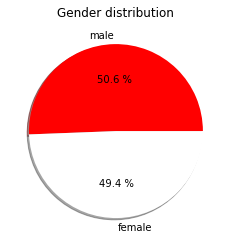

In [10]:
colors = ["#FF0000", "#FFFFFF"]
genders = [df["gender"].value_counts()["male"], df["gender"].value_counts()["female"]]
labels = ["male", "female"]

plt.pie(genders, labels=labels, colors=colors, shadow=True, autopct='%.1f %%')
plt.title('Gender distribution')
plt.show()

### Birth year distribution

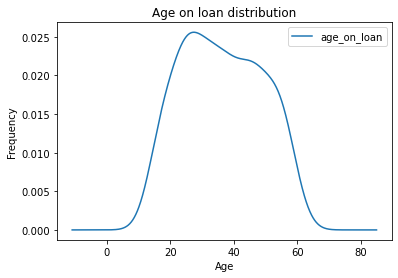

In [11]:
columns = ["loan_date", "birth_number"]

df_age = df.copy()

for column in columns:
    df_age[column] = df_age[column].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%Y')).astype(int)

df_age = pd.DataFrame(df_age["loan_date"] - df_age["birth_number"], columns=["age_on_loan"])
ax = df_age.plot.density()

plt.title("Age on loan distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

## Loan Success

### Loan success by birth year

The following graph shows that there isn't a direct correlation between the birth year and the loan success.

Text(0.5, 1.0, 'Loan success by age on loan')

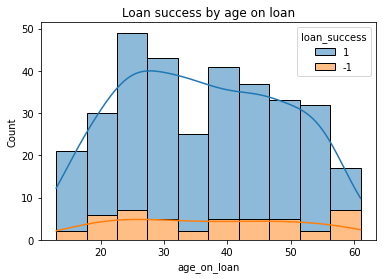

In [12]:
columns = ["loan_date", "birth_number"]
copy = df.copy()

for column in columns:
    copy[column] = copy[column].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%Y')).astype(int)
df_age = pd.DataFrame()
df_age["age_on_loan"] = copy["loan_date"] - copy["birth_number"]
df_age["loan_success"] = copy["loan_success"]

yes = df_age.loc[df["loan_success"] > -1, "age_on_loan"]
no = df_age.loc[df["loan_success"] < 1, "age_on_loan"]

df_accepted = pd.DataFrame(data = yes, columns=['age_on_loan']).assign(loan_success = '1')
df_not_accepted = pd.DataFrame(data = no, columns=['age_on_loan']).assign(loan_success = '-1')

sns.histplot(data=pd.concat([df_accepted, df_not_accepted]), x='age_on_loan', hue='loan_success', multiple="stack", kde=True, alpha=0.5).set_title("Loan success by age on loan")

### Loan status by average salary

From the next graph we can infer that people who live in districts with lower average salary tend to have more unsuccessful loans than people who live in districts with higher average salary.

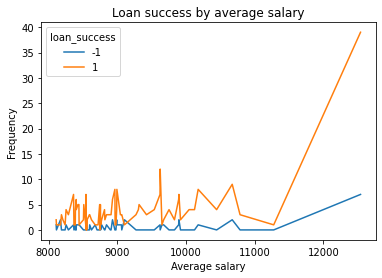

In [13]:
successbyavgsalary = pd.crosstab(df['account_district average salary'], df['loan_success'])

successbyavgsalary.plot(kind="line")

plt.title("Loan success by average salary")
plt.xlabel("Average salary")
plt.ylabel("Frequency")

plt.show()

### Loan success by card type

The following graph allows us to determine that all people with any card type other than "None" (people with a card) from the training set had a successful loan.

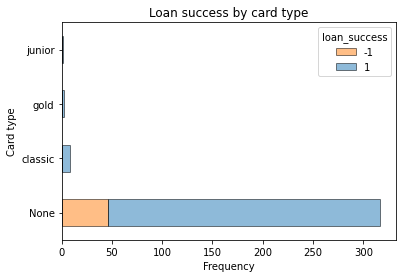

In [14]:
successbycard = pd.crosstab(df["card_type"], df["loan_success"])

successbycard.plot(kind="barh", stacked=True, ec="black", color=["tab:orange", "tab:blue"], alpha=0.5)

plt.title("Loan success by card type")
plt.xlabel("Frequency")
plt.ylabel("Card type")

plt.show()

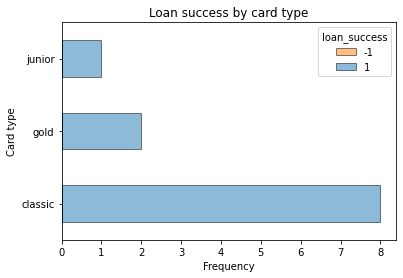

In [15]:
successbycard = pd.crosstab(df["card_type"], df["loan_success"])

successbycard = successbycard.drop("None")
successbycard.plot(kind="barh", stacked=True, ec="black", color=["tab:orange", "tab:blue"], alpha=0.5)

plt.title("Loan success by card type")
plt.xlabel("Frequency")
plt.ylabel("Card type")

plt.show()

### Loan success by gender

This graph allows us to acknowledge the lack of correlation between gender and loan success.

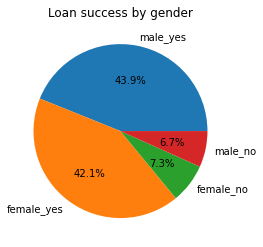

In [16]:
successbygender = pd.DataFrame(df["gender"]).join(pd.DataFrame(df["loan_success"]))

labels = ["male_yes", "female_yes", "female_no", "male_no"]
sizes = successbygender.value_counts()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("Loan success by gender")

plt.show()

### Loan success by average balance and number of movements

This graph shows that there is a high correlation between the pair of attributes "no. movements" and "avg balance" and the success of a loan, demonstrating that a higher number of movements or a higher average balance of the account upon requesting a loan are more common on successful loans.

Text(0.5, 1.0, 'Loan success by average balance and number of movements')

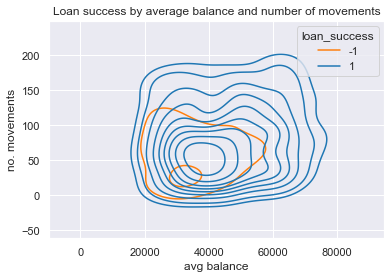

In [17]:
sns.set_theme(style="darkgrid")

sns.kdeplot(data=df, y="no. movements", x="avg balance", hue="loan_success", thresh=.1, palette=[sns.color_palette("tab10")[1], sns.color_palette("tab10")[0]]).set_title("Loan success by average balance and number of movements")